## Content List
1. Import libraries
2. Create project path
3. Import file and check structure
4. Create profile for Age groups
5. Create profile for income groups
6. Import and merge deparments and check for high demand
7. Create profile for dependants
8. Export file

In [1]:
#import all libraries including visualization
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path to project folder
path = r'C:\Users\tatal\06-2023 Instacart Basket Analysis'

In [3]:
#IMPORT mereged product_customer file
df_order_customer_prd_high = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'full_file_v4.pkl'))

In [4]:
df_order_customer_prd_high.shape

(30964564, 36)

In [5]:
df_order_customer_prd_high.dtypes

index                       int64
user_id                     int32
Gender                     object
STATE                      object
Age                         int16
date_joined                object
n_dependants                 int8
fam_status                 object
income                      int32
order_id                    int32
order_number                int16
orders_day_of_week           int8
order_hour_of_day            int8
days_since_last_order     float32
product_id                  int16
add_to_cart_order           int16
reordered                    int8
product_name               object
aisle_id                    int16
department_id                int8
prices                    float32
price_range_loc            object
busiest_day                object
Busiest_days               object
busiest_period_of_day      object
max_order                   int16
loyalty_flag               object
mean_price                float32
spending_flag              object
median_days_la

In [6]:
df_order_customer_prd_high.head(5)

,index,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,order_id,...,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_last_order,frequency_flag,region,customer_activity
0,0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,...,Busiest days,most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High-activity
1,1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,...,Regularly busy days,most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High-activity
2,2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,...,Busiest days,most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High-activity
3,3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,...,Regularly busy days,most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High-activity
4,4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,...,Least busy days,most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High-activity


## Create Age groups

In [7]:
df_order_customer_prd_high['Age'].value_counts()

79    508337
49    507879
48    506730
31    506218
64    504832
       ...  
60    461897
36    460649
66    454604
41    451269
25    449324
Name: Age, Length: 64, dtype: int64

In [15]:
df_order_customer_prd_high['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [47]:
df_order_customer_prd_high['Age'].agg([max, min, 'mean'])

max     81.000000
min     18.000000
mean    49.468026
Name: Age, dtype: float64

In [22]:
# Create a column for age groupe - young adult is less or equl to 25
df_order_customer_prd_high.loc[df_order_customer_prd_high['Age'] <= 25, 'age_group'] = 'Young Adult'

In [23]:
# Create a column for age groupe - adult is more than 25 and less than 40 - Adult
df_order_customer_prd_high.loc[(df_order_customer_prd_high['Age'] > 25) & (df_order_customer_prd_high['Age'] < 40), 'age_group'] = 'Adult'

In [24]:
# Create a column for age groupe - adult is more than or equal 40 and less than 60 - Middle Age
df_order_customer_prd_high.loc[(df_order_customer_prd_high['Age'] >= 40) & (df_order_customer_prd_high['Age'] < 60), 'age_group'] = 'Middle Age'

In [25]:
# Create a column for age groupe - adult is more than or equal 60 - Senior
df_order_customer_prd_high.loc[df_order_customer_prd_high['Age'] >= 60, 'age_group'] = 'Senior'

In [26]:
df_order_customer_prd_high['age_group'].value_counts()

Senior         10574504
Middle Age      9724950
Adult           6800592
Young Adult     3864518
Name: age_group, dtype: int64

In [4]:
df_order_customer_prd_high.shape

(30964564, 34)

In [42]:
#export fjle
df_order_customer_prd_high.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'full_file_v4.pkl'))

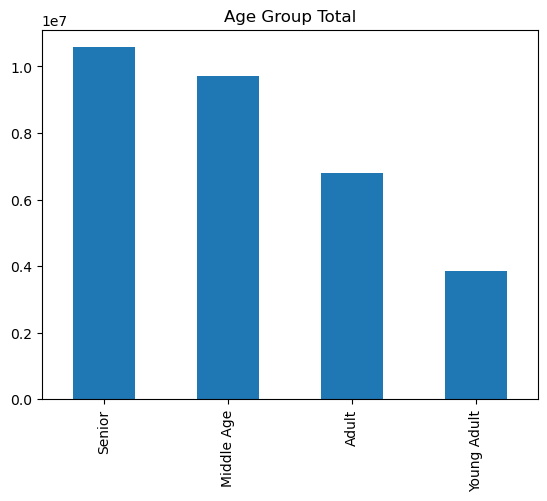

In [4]:
## Create age_group chart
age_group_bar = df_order_customer_prd_high['age_group'].value_counts().plot.bar()
plt.title('Age Group Total')
plt.show()

In [5]:
#Export bar figure
age_group_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_bar.png'))

In [8]:
# get some information ofthe order per age group, agg days since last order know frequency, and prices
age_group_orders = df_order_customer_prd_high.groupby('age_group').agg({'days_since_last_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

In [11]:
age_group_orders.to_clipboard()

In [10]:
age_group_orders

days_since_last_order                 prices               
                              max       mean  min    max      mean  min
age_group                                                              
Adult                        30.0  10.818212  0.0   25.0  7.784778  1.0
Middle Age                   30.0  10.819702  0.0   25.0  7.791641  1.0
Senior                       30.0  10.800664  0.0   25.0  7.795446  1.0
Young Adult                  30.0  10.799070  0.0   25.0  7.784889  1.0

In [12]:
##Cross tab age groups and days of the week
agegroup_days  = pd.crosstab(df_order_customer_prd_high['age_group'], df_order_customer_prd_high['orders_day_of_week'], dropna = False)

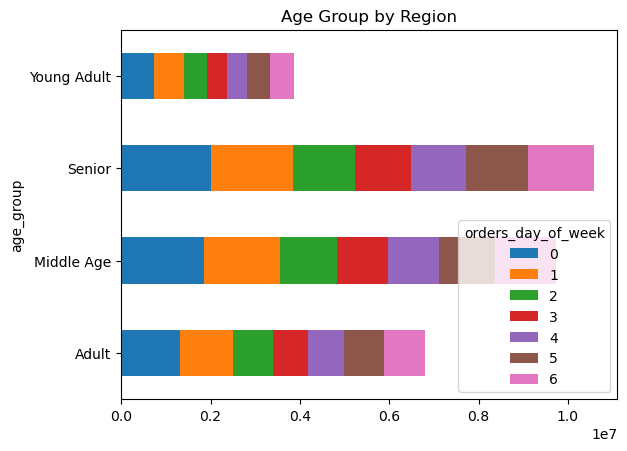

In [39]:
## Bar charge for region and age
age_days = agegroup_days.plot.barh(stacked=True)
plt.title('Age Group by Region')
plt.show()

In [13]:
agegroup_days.to_clipboard()

In [40]:
#Export bar figure
age_days.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_days_bar.png'))

In [24]:
##Cross tab region
ageregion=pd.crosstab(df_order_customer_prd_high['age_group'],df_order_customer_prd_high['region'],dropna=False)

In [17]:
ageregion.to_clipboard()

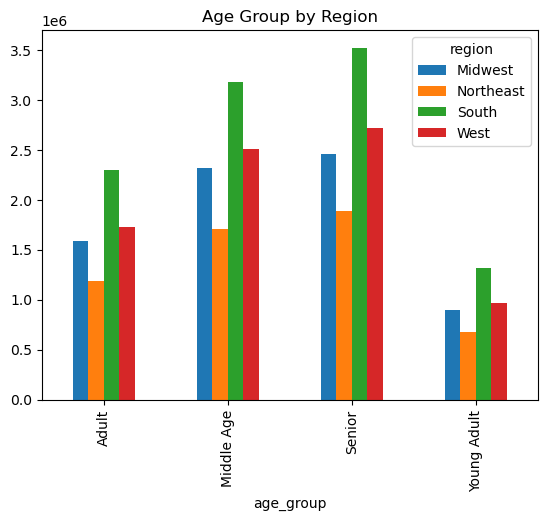

In [25]:
## Bar charge for region and age
age_region_bar = ageregion.plot.bar()
plt.title('Age Group by Region')
plt.show()

In [26]:
#Export bar figure
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region_bar.png'))

In [35]:
##Cross tab department and age
age_detp=pd.crosstab(df_order_customer_prd_high['department'],df_order_customer_prd_high['age_group'],dropna=False)

In [36]:
age_detp.to_clipboard()

In [55]:
##Cross tab product and age
age_product=pd.crosstab(df_order_customer_prd_high['product_name'],df_order_customer_prd_high['age_group'],dropna=False)

In [42]:
age_product.to_clipboard()

## Create Income group

In [48]:
df_order_customer_prd_high['income'].agg([max, min, 'mean'])

max     593901.000000
min      25903.000000
mean     99675.865108
Name: income, dtype: float64

In [21]:
df_order_customer_prd_high['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [4]:
# Create a column for income groupe - less or equal to 67292 - low income
df_order_customer_prd_high.loc[df_order_customer_prd_high['income'] <= 67292, 'income_group'] = 'Low income'

In [39]:
# Create a column for income groupe - Avg Income higher than 67292 and lower than 96765
df_order_customer_prd_high.loc[(df_order_customer_prd_high['income'] > 67292) & (df_order_customer_prd_high['income'] < 96765) , 'income_group'] = 'Avg income'

In [40]:
# Create a column for income groupe - More or equal to  96765- High income
df_order_customer_prd_high.loc[df_order_customer_prd_high['income'] >= 96765, 'income_group'] = 'High income'

In [41]:
df_order_customer_prd_high['income_group'].value_counts()

High income    15483427
Low income      7741348
Avg income      7739789
Name: income_group, dtype: int64

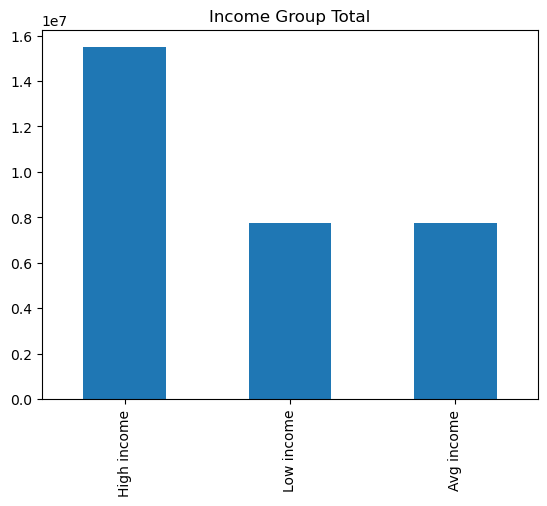

In [6]:
## Create income_group chart
income_group_bar = df_order_customer_prd_high['income_group'].value_counts().plot.bar()
plt.title('Income Group Total')
plt.show()

In [7]:
#Export bar figure
income_group_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_bar.png'))

In [43]:
##Cross tab income and age
age_income=pd.crosstab(df_order_customer_prd_high['income_group'],df_order_customer_prd_high['age_group'],dropna=False)

In [44]:
age_income.to_clipboard()

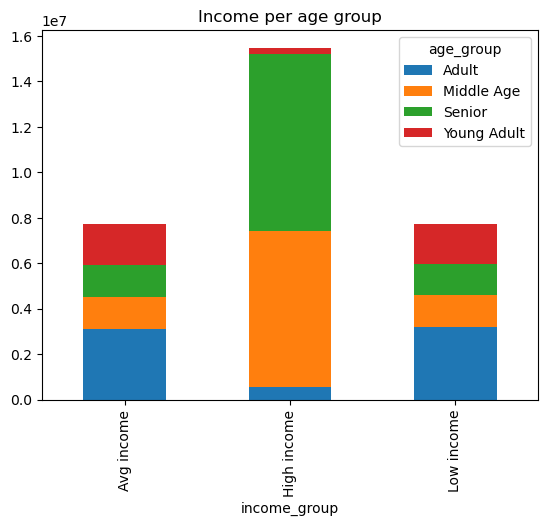

In [46]:
## Bar charge income
age_income_bar = age_income.plot.bar(stacked=True)
plt.title('Income per age group')
plt.show()

In [47]:
#Export bar figure
age_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_bar.png'))

In [48]:
##Cross tab region
income_region=pd.crosstab(df_order_customer_prd_high['income_group'],df_order_customer_prd_high['region'],dropna=False)

In [49]:
income_region.to_clipboard()

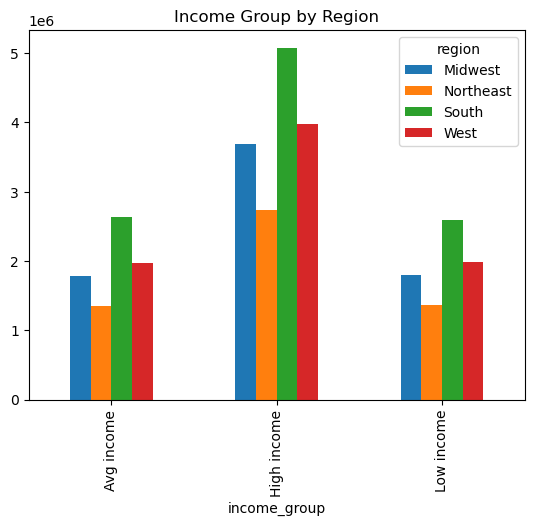

In [50]:
## Bar charge for region and income
income_region_bar = income_region.plot.bar()
plt.title('Income Group by Region')
plt.show()

In [51]:
#Export bar figure
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_region_bar.png'))

In [52]:
##Cross tab department and income
income_detp=pd.crosstab(df_order_customer_prd_high['department'],df_order_customer_prd_high['income_group'],dropna=False)

In [53]:
income_detp.to_clipboard()

In [56]:
##Cross tab product and income
income_product=pd.crosstab(df_order_customer_prd_high['product_name'],df_order_customer_prd_high['income_group'],df_order_customer_prd_high['income_group'],dropna=False)

In [57]:
income_product.to_clipboard()

## Merge departments and look into products

In [51]:
## Check product name
df_order_customer_prd_high['product_name'].value_counts()

Banana                                           453164
Bag of Organic Bananas                           366403
Organic Strawberries                             255988
Organic Baby Spinach                             231772
Organic Hass Avocado                             206799
                                                  ...  
Organic ZFruit Rope Fruit Punch Flavor                1
Zero Mercury 2025 Lithium Batteries                   1
Control GX Gray Reducing Shampoo                      1
Yogurt, Coconut Non-Dairy, Low Fat, Blueberry         1
Vitamin D Gummies                                     1
Name: product_name, Length: 49630, dtype: int64

In [52]:
##Check Department
df_order_customer_prd_high['department_id'].value_counts()

4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: department_id, dtype: int64

In [4]:
# import department file
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [5]:
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
# remane Unnamed: 0 to department_id
df_dept.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [7]:
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
df_dept.shape

(21, 2)

In [12]:
# merge product customer with dept
df_cust_focus = df_order_customer_prd_high.merge(df_dept,on='department_id')

In [11]:
df_dept.dtypes

department_id      int8
department       object
dtype: object

In [10]:
##Change type to int8
df_dept['department_id'] = df_dept['department_id'].astype('int8')

In [13]:
df_cust_focus.shape

(30964564, 36)

In [68]:
#export merged  fjle
df_cust_focus.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'full_file_v4.pkl'))

NameError: name 'df_cust_focus' is not defined

In [60]:
##Departments orders
df_order_customer_prd_high['department'].value_counts()

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

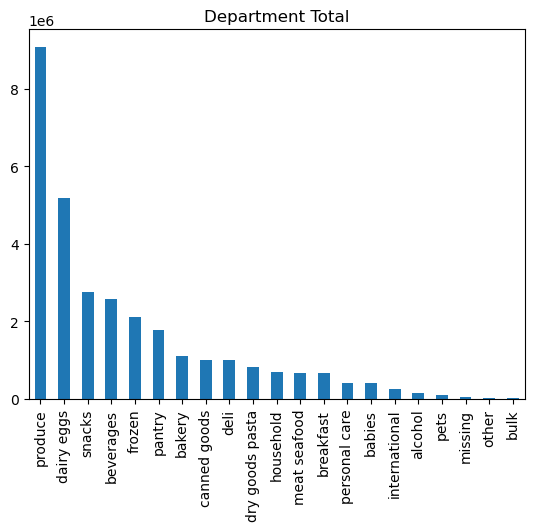

In [71]:
## Create income_group chart
department_bar = df_order_customer_prd_high['department'].value_counts().plot.bar()
plt.title('Department Total')
plt.show()

In [62]:
#Export bar figure
department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_bar.png'))

## Profile dependants

In [64]:
# Create a column dependant
df_order_customer_prd_high.loc[df_order_customer_prd_high['n_dependants'] == 0, 'dependant_status'] = 'no dependant'

In [65]:
# Create a column dependant
df_order_customer_prd_high.loc[df_order_customer_prd_high['n_dependants'] > 0, 'dependant_status'] = 'with dependant'

In [67]:
##Dependant
df_order_customer_prd_high['dependant_status'].value_counts()

with dependant    23224883
no dependant       7739681
Name: dependant_status, dtype: int64

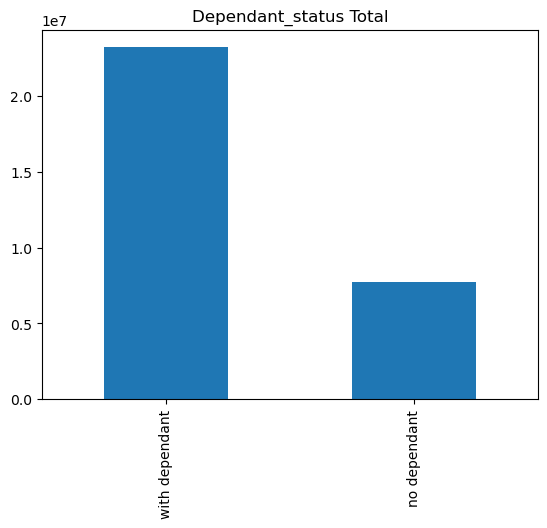

In [70]:
## Create dependat chart
dependant_bar = df_order_customer_prd_high['dependant_status'].value_counts().plot.bar()
plt.title('Dependant_status Total')
plt.show()

In [72]:
#Export bar figure
dependant_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependant_bar.png'))

In [76]:
##Cross tab dependant and income
age_depend=pd.crosstab(df_order_customer_prd_high['dependant_status'],df_order_customer_prd_high['age_group'],dropna=False)

In [74]:
age_depend.to_clipboard()

In [89]:
family_status = df_order_customer_prd_high.groupby(['region','fam_status','dependant_status','age_group','income_group']).agg({'prices': ['mean', 'min', 'max'],'days_since_last_order': ['mean', 'min', 'max'], 'order_id':['count']})

In [87]:
family_status 

prices  \
                                                                                        mean   
region  fam_status                       dependant_status age_group   income_group             
Midwest divorced/widowed                 no dependant     Senior      Avg income    7.947133   
                                                                      High income   7.937217   
                                                                      Low income    6.714272   
        living with parents and siblings with dependant   Young Adult Avg income    7.972224   
                                                                      High income   7.948549   
...                                                                                      ...   
West    single                           no dependant     Middle Age  High income   7.925977   
                                                                      Low income    6.877724   
                                                          Young Adult Avg income    7.936929   
                                                                      High income   7.988521   
                                                                      Low income    7.470013   

                                                                                         \
                                                                                    min   
region  fam_status                       dependant_status age_group   income_group        
Midwest divorced/widowed                 no dependant     Senior      Avg income    1.0   
                                                                      High income   1.0   
                                                                      Low income    1.0   
        living with parents and siblings with dependant   Young Adult Avg income    1.0   
                                                                      High income   1.0   
...                                                                                 ...   
West    single                           no dependant     Middle Age  High income   1.0   
                                                                      Low income    1.0   
                                                          Young Adult Avg income    1.0   
                                                                      High income   1.0   
                                                                      Low income    1.0   

                                                                                          \
                                                                                     max   
region  fam_status                       dependant_status age_group   income_group         
Midwest divorced/widowed                 no dependant     Senior      Avg income    25.0   
                                                                      High income   25.0   
                                                                      Low income    25.0   
        living with parents and siblings with dependant   Young Adult Avg income    25.0   
                                                                      High income   25.0   
...                                                                                  ...   
West    single                           no dependant     Middle Age  High income   25.0   
                                                                      Low income    25.0   
                                                          Young Adult Avg income    25.0   
                                                                      High income   25.0   
                                                                      Low income    25.0   

                                                                                   order_id  
                                                                                   

In [90]:
family_status.to_clipboard()

In [4]:
##Cross tab department and dependant
department_depend=pd.crosstab(df_order_customer_prd_high['department'],df_order_customer_prd_high['dependant_status'],dropna=False)

In [5]:
department_depend.to_clipboard()

In [91]:
#export full file
df_order_customer_prd_high.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'full_file_v4.pkl'))